# Lecture 10 : Handwritten Digit Classification

## Python imports and parameter settings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
plt.rcParams['figure.figsize'] = [8,6]

## Clone the materials repo on github to access datafiles.

In [ ]:
!git clone https://github.com/jasonrwilson/cmda3634_materials

Cloning into 'cmda3634_materials'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 124 (delta 7), reused 1 (delta 1), pack-reused 103
Receiving objects: 100% (124/124), 12.19 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (61/61), done.


## Copy the lecture 10 files into our workspace.

In [ ]:
!cp cmda3634_materials/L10/*.gz .

# Part 1 : Working with Grayscale Images in Python

* Grayscale images are stored using a matrix where each entry in the matrix corresponds to the grayscale intensity of the pixel.

* The grayscale intensity values range between 0 (black) and 255 (white).  

* Since there are 256 possible values an intensity is typically stored using 8 bits (1 byte).

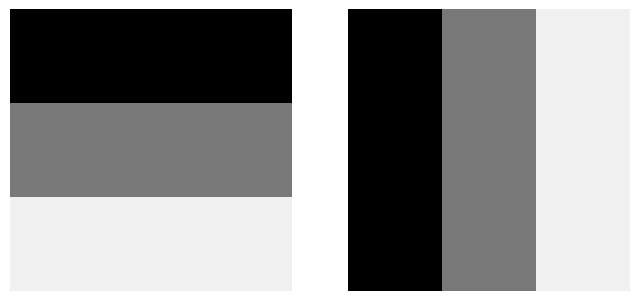

In [ ]:
A = np.array([[0,0,0],[120,120,120],[240,240,240]])
f, axarr = plt.subplots(1,2)
axarr[0].imshow(A,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(A.T,cmap='gray',vmin=0, vmax=255)
axarr[0].axis('off')
axarr[1].axis('off');

## Concept : We can flatten a $m \times n$ matrix into a vector in $\mathbb{R}^{mn}$.  

## For example the matrix
$$A = \begin{bmatrix} 1 & 2 & 3 \\ 6 & 5 & 4 \end{bmatrix}$$

## can be flattened into the row vector in row-major order:
$$\mathbf{x}^T = \begin{bmatrix} 1 & 2 & 3 & 6 & 5 & 4 \end{bmatrix}$$

## This technique allows us to store a set of image matrices as row vectors in a single matrix.

printing all 9 images as rows in a single 9 x 9 matrix

[[  0  15  30  45  60  75  90 105 120]
 [ 15  30  45  60  75  90 105 120 135]
 [ 30  45  60  75  90 105 120 135 150]
 [ 45  60  75  90 105 120 135 150 165]
 [ 60  75  90 105 120 135 150 165 180]
 [ 75  90 105 120 135 150 165 180 195]
 [ 90 105 120 135 150 165 180 195 210]
 [105 120 135 150 165 180 195 210 225]
 [120 135 150 165 180 195 210 225 240]]
printing the third image as a 3 x 3 matrix
 [[ 30  45  60]
 [ 75  90 105]
 [120 135 150]]
showing all 9 images



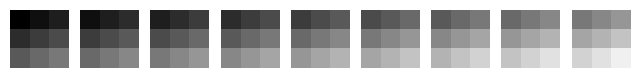

In [ ]:
# Use a 9 x 9 matrix C to store 9 images where each image is 3 x 3
C = np.zeros((9,9),dtype=np.uint8)
for i in range(9):
    for j in range(9):
        C[i][j] = 15*i+15*j
print ('printing all 9 images as rows in a single 9 x 9 matrix\n')
print (C)
# Print the third image as a 3 x 3 matrix
image = C[2].reshape(3,3)
print ('printing the third image as a 3 x 3 matrix\n',image)
# Show all 9 images
print ('showing all 9 images\n')
f, axarr = plt.subplots(1,9)
for i in range(9):
    image = C[i].reshape(3,3)
    axarr[i].imshow(image,cmap='gray',vmin=0,vmax=255)
    axarr[i].axis('off')

# Part 2 : The MNIST Dataset

## The MNIST Training Set

### The MNIST training set has 60000 separate images and class labels.

In [ ]:
# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)
print(train.shape)

(60000, 784)


In [ ]:
# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)
print (train_labels.shape)

(60000,)


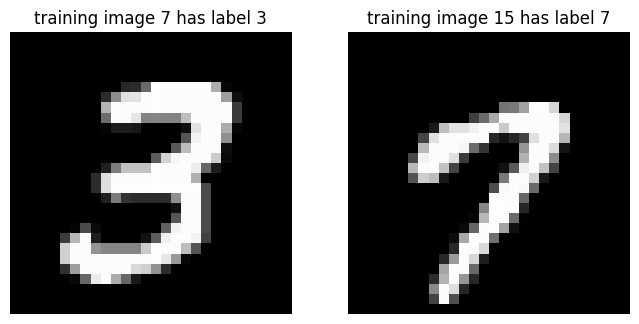

In [ ]:
# plot 2 training images with labels
train_1 = 7
train_2 = 15
f, axarr = plt.subplots(1,2)
image1 = train[train_1].reshape(28,28)
image2 = train[train_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('training image '+str(train_1)+' has label '+str(train_labels[train_1]))
axarr[1].set_title('training image '+str(train_2)+' has label '+str(train_labels[train_2]))
axarr[0].axis('off')
axarr[1].axis('off');

## The MNIST Test Set

### To test how well our classifier *generalizes* we need to run it on *test data*.
### It is critical that our *test data* is *separate* from our *training data*.
### Fortunately there is a MNIST test set with 10000 separate images and class labels.

In [ ]:
# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
test = data.reshape(10000,28*28)
print(test.shape)

(10000, 784)


In [ ]:
#Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)
print (test_labels.shape)

(10000,)


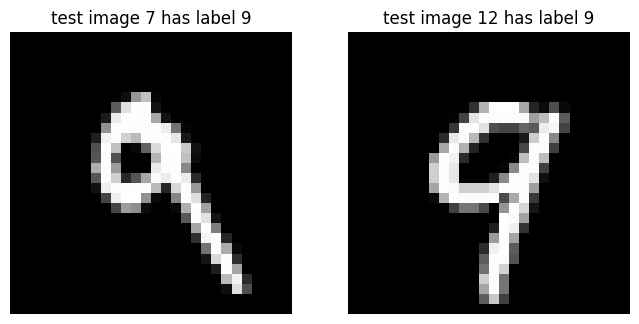

In [ ]:
# plot 2 test images with labels
test_1 = 7
test_2 = 12
f, axarr = plt.subplots(1,2)
image1 = test[test_1].reshape(28,28)
image2 = test[test_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('test image '+str(test_1)+' has label '+str(test_labels[test_1]))
axarr[1].set_title('test image '+str(test_2)+' has label '+str(test_labels[test_2]))
axarr[0].axis('off')
axarr[1].axis('off');

# Part 3 : Nearest Neighbor Classification

In [ ]:
# find the index of the training image closest to the test image with the given index
# note that we interpret the image data as 32 bit integers to avoid overflow
def nearest_train_index(train,test,test_index):
    min_dist_sq = np.inf
    for i in range(len(train)):
        diff = train[i].astype(np.int32)-test[test_index].astype(np.int32)
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest_train_index = i
    return nearest_train_index

CPU times: user 624 ms, sys: 2.05 ms, total: 626 ms
Wall time: 886 ms


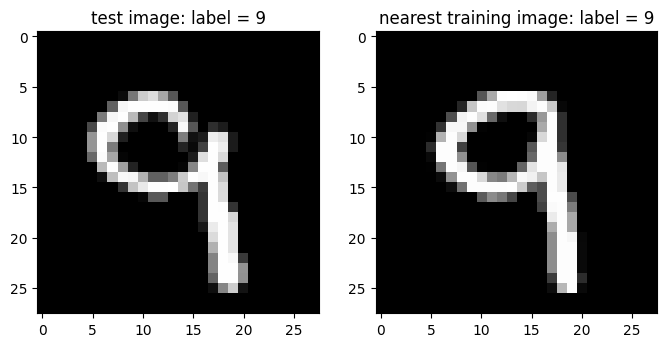

In [ ]:
%%time
test_index = 2342
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## To classify a test image using nearest neighbor classification, we choose the class of the nearest training image.  

In [ ]:
%%time
# to find images that are classified incorrectly use range(1100,1120)
classify_errors = 0
test_start = 0
num_test = 20
for test_index in range(test_start,test_start+num_test):
    train_index = nearest_train_index(train,test,test_index)
    if (test_labels[test_index] != train_labels[train_index]):
        classify_errors += 1
        print ('*',end="")
    print (test_index,train_index,test_labels[test_index],train_labels[train_index])
print ('number of digits classified incorrectly =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

0 53843 7 7
1 28882 2 2
2 58741 1 1
3 29044 0 0
4 52920 4 4
5 30809 1 1
6 18279 4 4
7 41982 9 9
8 52896 5 5
9 5044 9 9
10 49939 0 0
11 36036 6 6
12 55477 9 9
13 32899 0 0
14 39152 1 1
15 18418 5 5
16 25215 9 9
17 53483 7 7
18 29246 3 3
19 55328 4 4
number of digits classified incorrectly = 0
classificiation rate = 1.0
CPU times: user 8.58 s, sys: 40.7 ms, total: 8.62 s
Wall time: 12.4 s


## Let's visualize a test image that the nearest neighbor classifier missed on.

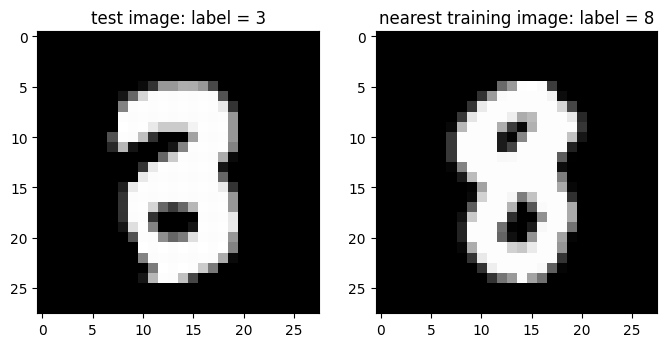

In [ ]:
test_index = 1114
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## What do you notice about doing digit classification using nearest neighbor search in Python?

## **Answer:**

# Part 4 : Calling C Functions From Python

## Recall that **train** is a 2d numpy array with 60000 rows that stores the MNIST training set.  

## Each row is a 28x28 image matrix that has been flattened into a 784 dimensional row vector.  

In [35]:
print (train.shape)
print (train.flags)
print (train.dtype)

(60000, 784)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

uint8


## C_CONTIGUOUS = True means that the elements of the 2d array are stored in a C-style row-major order. In other words, the last index of the array changes the fastest as you traverse the array.

## We will learn how to process C_CONTIGUOUS numpy arrays in when calling C code from Python.

## This will enable us to get the number crunching performance advantages of using C while retaining the simplicity of Python for tasks such as file I/O, visualization, etc.  

## Let's look at a simple example before diving into how to speed up our digit classifier using C.

## Note that when using C and Python together it is crucial that you carefully specify the type of your Python array elements so that it is clear how many bytes each element requires.  

## In this example, we specify that the elements of A are of type int32 which is a 4 byte integer (the same number of bytes as a C int).  

In [ ]:
%%writefile print2d.py
import numpy as np
# create 2d array
A = np.array([[ 1, 2, 3, 4 ], [ 5, 6, 7, 8 ], [ 9, 10, 11, 12 ] ],dtype='int32')
# print 2d array
print (A)

Writing print2d.py


In [ ]:
!python3 print2d.py

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## Next we will write a C function that prints a 2d array of integers that has been flattened into a 1d array using row-major order.

In [ ]:
%%writefile print2d.c
#include <stdio.h>
void print2d (int A[], int rows, int cols) {
    printf ("printing 2d array from C!\n");
    for (int i=0;i<rows;i++) {
        printf ("[ ");
        for (int j=0;j<cols;j++) {
            printf ("%d ",A[i*cols+j]);

        }
        printf ("]\n");
    }
}

Writing print2d.c


## In order to call our C function from Python we will need to create a **shared object library**.  This can be done using the following compiler command.

## Note: PIC stands for *position independent code*.

In [ ]:
!gcc -fPIC -shared -o print2d.so print2d.c

## Here is a Python script that calls our C function to print the 2d array.

In [ ]:
%%writefile print2d_c.py
import numpy as np
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./print2d.so") # load C print2d function

# create 2d array
A = np.array([[ 1, 2, 3, 4 ], [ 5, 6, 7, 8 ], [ 9, 10, 11, 12 ] ],dtype='int32')
(rows,cols) = A.shape

# print 2d array using C function
A_cptr = A.ctypes.data_as(ct.POINTER(ct.c_int32))
lib.print2d(A_cptr,ct.c_int(rows),ct.c_int(cols))

Writing print2d_c.py


In [ ]:
!python3 print2d_c.py

printing 2d array from C!
[ 1 2 3 4 ]
[ 5 6 7 8 ]
[ 9 10 11 12 ]


## For our next example we will write code to calculate a matrix vector product.

## We start with a pure Python version.

In [ ]:
%%writefile matvec.py
import numpy as np

# create 2d array of doubles
A = np.array([[0.2,1,2],[1,2.5,3],[4,5.8,6],[7,8,9.3]],dtype='float64')
(rows,cols) = A.shape
x = np.array([1,1,1],dtype='float64')
b = np.empty(4,dtype='float64');

# matvec multiply
for i in range(rows):
    b[i] = 0
    for j in range(cols):
        b[i] += A[i][j]*x[j]

# print result
print (b)

Writing matvec.py


In [ ]:
!python3 matvec.py

[ 3.2  6.5 15.8 24.3]


## Next we write a C function to perform the matvec multiply.

In [ ]:
%%writefile matvec.c
void matvec(double A[], int rows, int cols, double x[], double b[]) {
    for (int i=0;i<rows;i++) {
        b[i] = 0;
        for (int j=0;j<cols;j++) {
            b[i] += A[i*cols+j]*x[j];
        }
    }
}

Writing matvec.c


## Create a shared object library for our C code.

In [ ]:
!gcc -fPIC -shared -o matvec.so matvec.c

## Finally, let's modify the Python script to call our C function.

In [ ]:
%%writefile matvec_c.py
import numpy as np
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./matvec.so") # load C matvec function

# create 2d array of doubles
A = np.array([[0.2,1,2],[1,2.5,3],[4,5.8,6],[7,8,9.3]],dtype='float64')
(rows,cols) = A.shape
x = np.array([1,1,1],dtype='float64')
b = np.empty(4,dtype='float64');

# call C to do the matvec multiply
A_cptr = A.ctypes.data_as(ct.POINTER(ct.c_double))
x_cptr = x.ctypes.data_as(ct.POINTER(ct.c_double))
b_cptr = b.ctypes.data_as(ct.POINTER(ct.c_double))
lib.matvec(A_cptr,ct.c_int(rows),ct.c_int(cols),x_cptr,b_cptr)

# print result
print (b)

Writing matvec_c.py


In [ ]:
!python3 matvec_c.py

[ 3.2  6.5 15.8 24.3]


# Part 5 : Calling C from Python to Accelerate Digit Classification

## Here is a Python script that performs does nearest neighbor classification on the MNIST data.

## It takes a single command line argument which specifies how many MNIST images to test.


In [ ]:
%%writefile nearest.py
import sys
import numpy as np
import gzip
import time # to time part of the code

# make sure a command line argument for the number of test images is provided
if (len(sys.argv) < 2):
    print ('command usage :',sys.argv[0],'num_test')
    exit(1)
num_test = int(sys.argv[1])
print ('number of digits to classify =',num_test)

# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)

# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)

# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf, dtype=np.uint8)
test = data.reshape(10000,28*28)

# Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)

# Allocate space to store the nearest neighbor indices
nearest = np.empty(num_test,dtype='int32')

# time just the nearest neighbor code
start = time.process_time()

# find the index of the training image closest to the test image with the given index
# note that we interpret the image data as 32 bit integers to avoid overflow
for test_index in range(num_test):
    min_dist_sq = np.inf
    for train_index in range(len(train)):
        diff = train[train_index].astype(np.int32)-test[test_index].astype(np.int32)
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest[test_index] = train_index

# record and print elapsed time
elapsed = time.process_time()-start
print ('Time to find nearest neighbors in Python =',np.round(elapsed,4),'seconds')

# count nearest neighbor classification errors
labels_diff = test_labels[:num_test] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

Writing nearest.py


In [ ]:
!time python3 nearest.py 200

number of digits to classify = 200
Time to find nearest neighbors in Python = 70.0216 seconds
number of classification errors = 2
classificiation rate = 0.99

real	1m16.400s
user	1m10.512s
sys	0m0.257s


# Estimate how long would it take to classify all 10000 test images in Python.

## **Answer:**

## The Python script is spending most of the time in lines 52-59 finding the nearest neighbors.  

## The pure number crunching code in lines 52-59 is precisely the type of thing C is good for!

## Here is a C function that just finds the nearest neighbors.

In [ ]:
%%writefile nearest.c
#include <stdio.h>
#include <stdlib.h>
#include <limits.h>

typedef unsigned char byte;

// calculates ||u-v||^2
// we accumulate the result using a C int to avoid overflow
int vec_dist_sq (byte u[], byte v[], int dim) {
    int dist_sq = 0;
    for (int i=0;i<dim;i++) {
        dist_sq += (u[i]-v[i])*(u[i]-v[i]);
    }
    return dist_sq;
}

// for each test vector find the nearest training vector
void nearest(byte train[], int num_train, byte test[], int num_test, int nearest[], int dim) {
    for (int i=0;i<num_test;i++) {
        int min_dist_sq = INT_MAX;
        for (int j=0;j<num_train;j++) {
            int dist_sq = vec_dist_sq(test+i*dim,train+j*dim,dim);
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest[i] = j;
            }
        }
    }
}

Writing nearest.c


## Create a shared object library for our C code.

## Note that we use the optimization flags -O3 and -march=native

In [ ]:
!gcc -O3 -march=native -fPIC -shared -o nearest.so nearest.c

## Finally, let's modify the Python script to call our C function.

In [ ]:
%%writefile nearest_c.py
import sys
import numpy as np
import gzip
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./nearest.so") # load C nearest function
import time # to time part of the code

# make sure a command line argument for the number of test images is provided
if (len(sys.argv) < 2):
    print ('command usage :',sys.argv[0],'num_test')
    exit(1)
num_test = int(sys.argv[1])
print ('number of digits classified =',num_test)

# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)

# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)

# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf, dtype=np.uint8)
test = data.reshape(10000,28*28)

# Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)

# Allocate space to store the nearest neighbor indices
nearest = np.empty(num_test,dtype='int32')

# time just the nearest neighbor code
start = time.process_time()

# find the nearest neighbors using C
train_cptr = train.ctypes.data_as(ct.POINTER(ct.c_uint8))
test_cptr = test.ctypes.data_as(ct.POINTER(ct.c_uint8))
nearest_cptr = nearest.ctypes.data_as(ct.POINTER(ct.c_int32))
lib.nearest(train_cptr,ct.c_int(len(train)),test_cptr,ct.c_int(num_test),
        nearest_cptr,ct.c_int(len(train[0])))

# record and print elapsed time
elapsed = time.process_time()-start
print ('Time to find nearest neighbors in C =',np.round(elapsed,4),'seconds')

# count nearest neighbor classification errors
labels_diff = test_labels[:num_test] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

Writing nearest_c.py


# We can now classify the entire test set in just over one minute using Python/C.

In [ ]:
!time python3 nearest_c.py 10000

number of digits classified = 10000
Time to find nearest neighbors in C = 63.4794 seconds
number of classification errors = 309
classificiation rate = 0.9691

real	1m5.591s
user	1m3.967s
sys	0m0.200s
